<a href="https://colab.research.google.com/github/Noobs-in-Devhack/AI---ML-/blob/main/8%20-%20K_Means_%26_Hierarchical_Clustering_Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Step 1. Import Libraries and Read Dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Disable Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
mall_customers = pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/Mall_Customers.csv")
mall_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##### Step 2. Data Manipulation

In [ ]:
mall_customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

##### EDA

<Axes: xlabel='Gender', ylabel='count'>

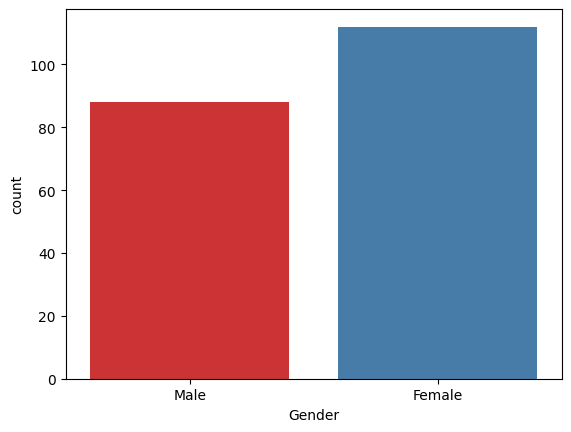

In [ ]:
sns.countplot(x = 'Gender', data = mall_customers, palette = 'Set1')

<Axes: xlabel='Annual Income (k$)', ylabel='count'>

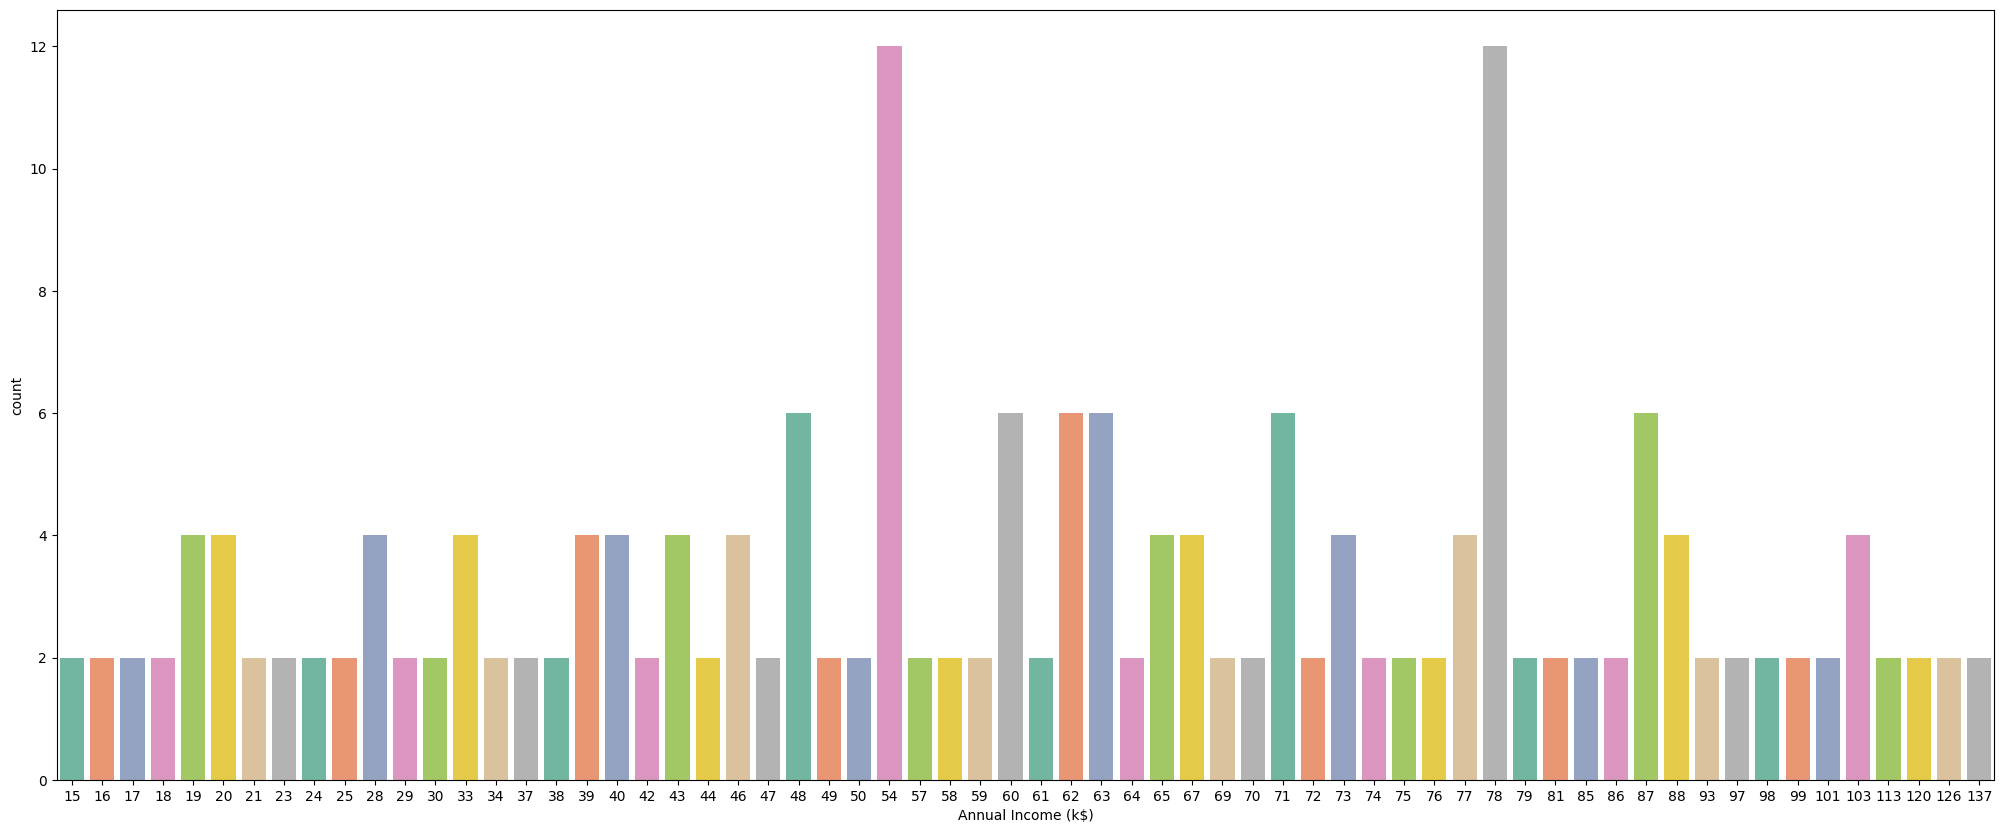

In [ ]:
plt.figure(figsize = (25,10))
sns.countplot(x = 'Annual Income (k$)', data = mall_customers, palette = 'Set2')

<Axes: xlabel='Spending Score (1-100)', ylabel='count'>

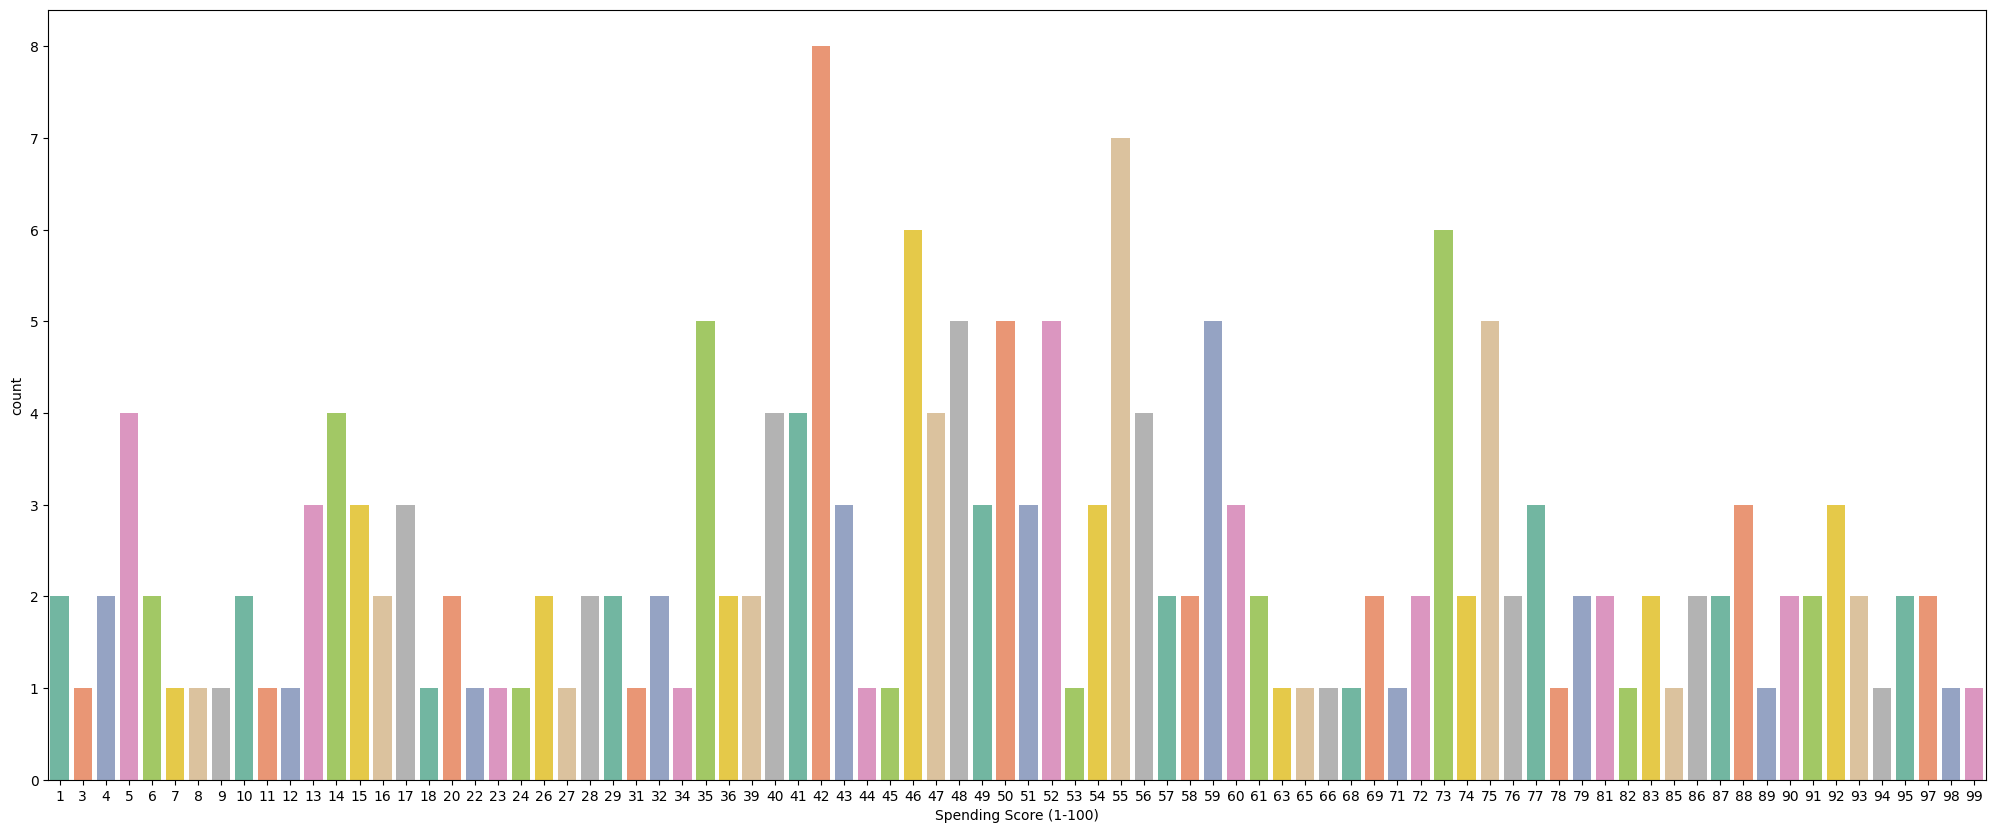

In [ ]:
plt.figure(figsize = (25,10))
sns.countplot(x = 'Spending Score (1-100)', data = mall_customers, palette = 'Set2')

##### Features

In [ ]:
X = mall_customers.iloc[:, [3,4]]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


##### Elbow Method

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,16):
    # n_clusters = value of 'k' this will range from (1-15), init = method to choose initial cluster data points
    # n_init = 10, inital value will be iterated for 10 different combinations
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    # interia = wcss
    wcss.append(kmeans.inertia_)

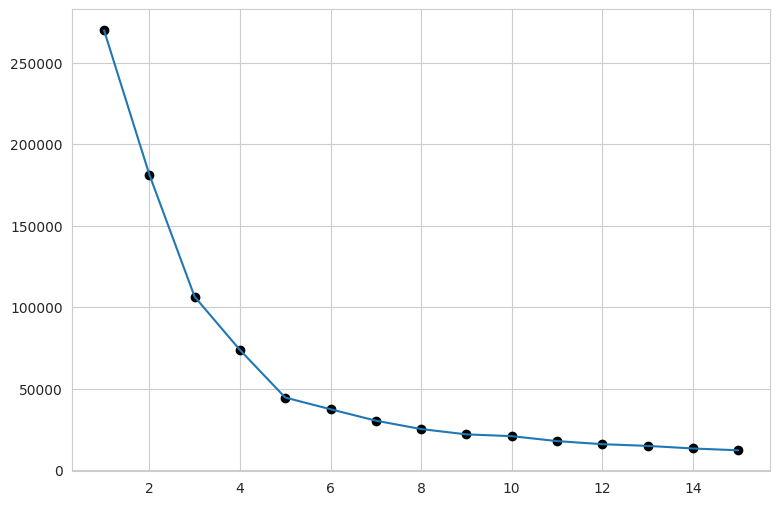

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize = (9,6))
plt.plot(range(1, 16), wcss)
plt.scatter(range(1, 16), wcss, color = 'black')

##### Elbow method. Optimum value of K = 5

In [ ]:
# n_clusters = Num of clusters
# init = It selects intial cluster centres for k-means clustering in smart way to speed up convergence
# max_iter = No. of Iterations
# n_init = Number of time k-means algorithm will run with different centroid values
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

In [ ]:
kmeans.fit(X)

KMeans(n_clusters=5, n_init=10, random_state=0)

In [ ]:
y_clusters = kmeans.predict(X)
y_clusters

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [ ]:
# Centroids
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

##### Cluster Visualization

In [ ]:
X["Cluster"] = y_clusters

In [ ]:
X

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


##### Cluster of Customers

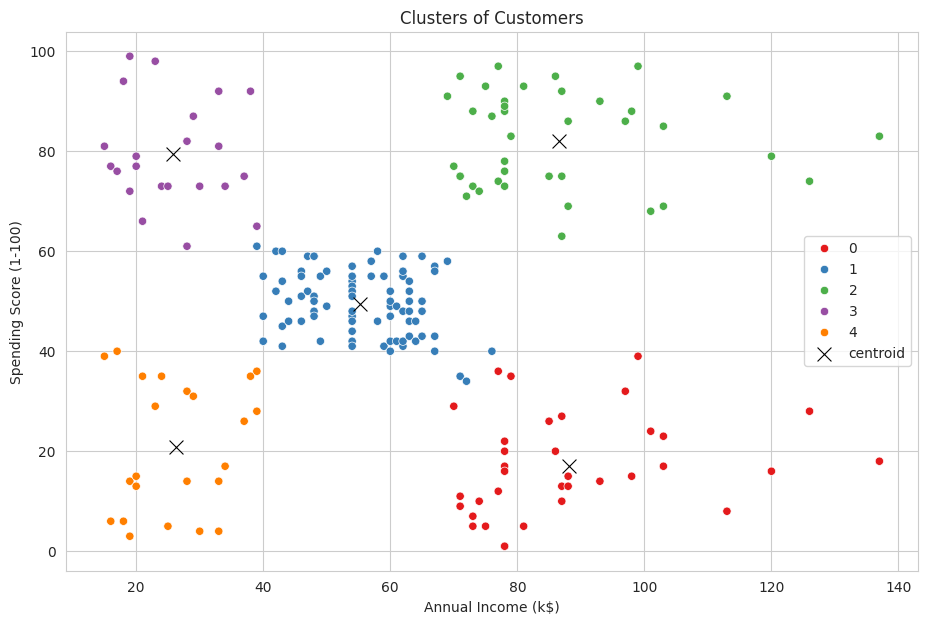

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize = (11,7))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Cluster', data = X, palette = 'Set1')
sns.scatterplot(x = kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1], marker = 'x', color = 'k', label = 'centroid', s = 100)
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

##### Hierarchical Clustering

In [ ]:
from seaborn.matrix import dendrogram
import scipy.cluster.hierarchy as sch

In [ ]:
X = mall_customers.iloc[:,[3,4]]

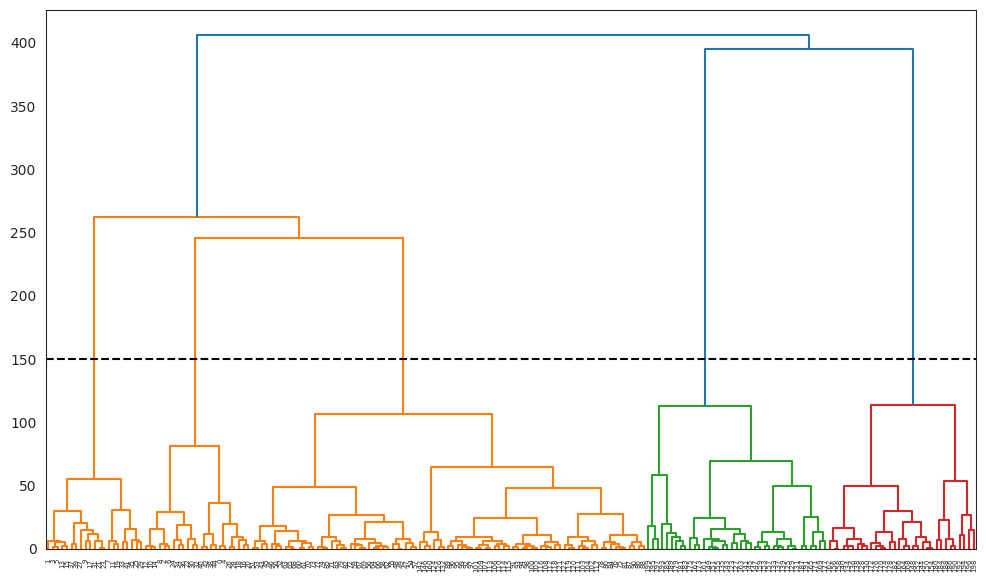

In [ ]:
sns.set_style('white')
fig = plt.figure(figsize = (12,7))
# method = 'complete', 'ward', 'single'
sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.axhline(150, color = 'k', linestyle = '--')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
# n_cluster = 5 (dendrogram)
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')

In [ ]:
hc.fit(X)

AgglomerativeClustering(metric='euclidean', n_clusters=5)

In [ ]:
y_hc = hc.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [ ]:
X['Cluster'] = y_hc

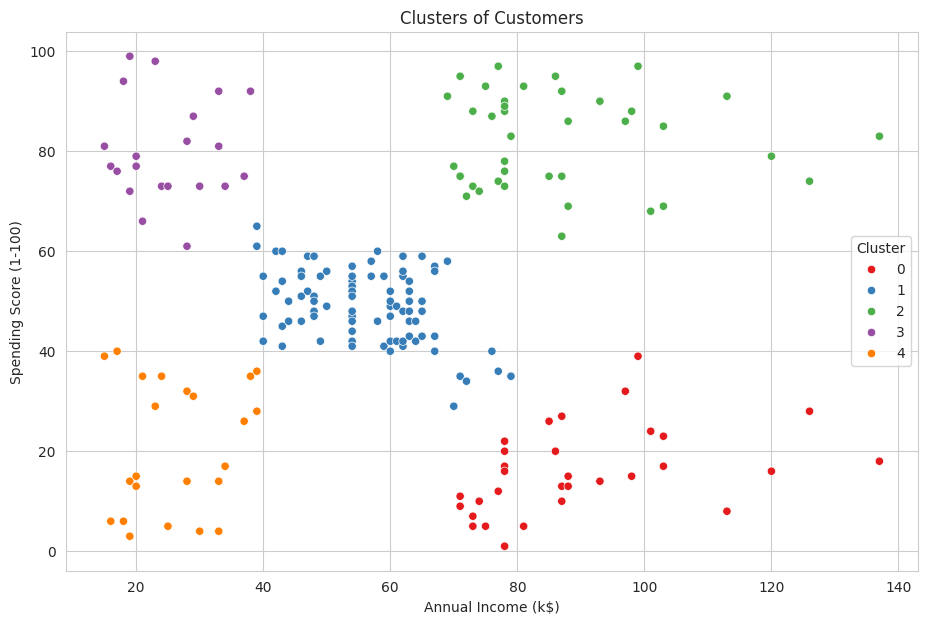

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize = (11,7))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Cluster', data = X, palette = 'Set1')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()